# The Epistemology of Deep Learning
# Example 1: Learning to Recognize Handwritten Numerical Digits

## The MNIST Database of Handwritten Digits


The MNIST image dataset is a collection of grayscale images of handwritten numerical digits ($28$ pixels $\times$ $28$ pixels). We will represent these images as arrays of $784$ ($28 \times 28$) numbers, each in the interval $[0, 1]$, representing the grayscale color intensity of the corresponding pixel ($0 =$ white, $1 =$ black). The images are divided into two disjoint sets: a set of $60,000$ training images (stored in the variable `training_images`) and set of ($10,000$) testing images (stored in the variable `testing_images`). In addition, the MNIST database provides a corresponding set of labels, indicating, for each image in the dataset, which numerical digit it depicts (these sets of labels are stored in the variables `training_labels` and `testing_labels`).    

Here is a sample image of a handwritten digit from the dataset, along with its corresponding label.

This is an image of a handwritten 8


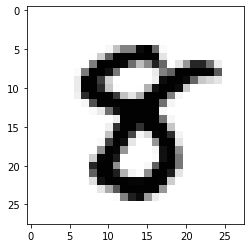

In [1]:
def display_image(image):
    """Displays an image"""
    image_2d = image.reshape(28, 28)
    plt.imshow(image_2d, interpolation='nearest', cmap='Greys')

def display_labeled_image(i):
    """Displays the ith training image with its corresponding label."""
    image = training_images[i]
    digit = training_labels[i]   
    
    print(f"This is an image of a handwritten {digit}")
    display_image(image)
    
display_labeled_image(2378)

## A Simple Neural Network

In this section, we will implement a simple neural network that can be used to identify the numerals depicted by images of handwritten digits, such as those which are stored in the MNIST dataset. Our neural network will consist of an input layer of linearly ordered nodes and an output layer of linearly ordered nodes, referred to collectively as *neurons*. The network will be fully connected in the sense that every input neuron will be connected to every output neuron. The graph of such a fully connected 2-layer neural network is pictured below:

![nn_simple](../assets/images/mnist/nn_simple.png)

The state of such a neural network is given by an assignment of numerical values, referred to as *weights*, to each of the links connecting the neurons. The network utilizes these weights to transform an assignment of numerical values to the neurons in the input layer into an assignment of numerical values to the neurons in the output layer. When we speak of 'training' the neural network, what we mean is the implementation of an algorithmic procedure by which the weights in the network are systematically adjusted so that certain inputs, when supplied to the network, produce more desirable outputs. 

For example, the neural network that we will use to classify the images in the MNIST dataset will contain $784$ neurons in the input layer (one for each pixel in a given image) and $10$ neurons in the output layer (one for each of the numerical digits $0,\ldots,9$). In training the network, our aim will be to adjust the weights so that any image of a handwritten digit, encoded as a sequence of $784$ input values, is transformed into a sequence of $10$ output values from which we can reliably infer what numerical digit is depicted in the image (e.g., the index of the largest numerical value in the output sequence could be taken to correspond to the depicted digit).  

### Gradient Descent

In order to provide a more concrete description of the method by which our neural network will be trained, we will take as given:

1. An ordered set of *inputs* on which the network will be trained, referred to as *training inputs*. Each training input assigns a numerical value to every neuron in the input layer.
2. An ordered set of *targets*, one for each training input, referred to as *training targets*. Each training target assigns a numerical value to every neuron in the output layer.


The specific method by which we will train the network is referred to as the method of *gradient descent*. We will first describe this method as it applies to any 2-layer neural network (while the basic idea behind the method is always the same, as we shall see, the details of its implementation are somewhat more involved when the method is applied to networks with more complex architectures). To describe the method precisely, it will be helpful to adopt the following notation:

1. $T$ is the number of training inputs (and training targets); $N_0$ is the number of nodes in the network's input layer; and $N_1$ is the number of nodes in the network's output layer. 

For $t=0,\ldots,T-1$:

2. $v^{t} = [v^{t}_0,\ldots, v^{t}_{N_0-1}]$, where $v^{t}_i = $ the value assigned to the $i^{\mathrm{th}}$ neuron in the input layer by the $t^{\mathrm{th}}$ training input.  
3. $l^{t} = [l^{t}_0,\ldots, l^{t}_{N_1-1}]$, where $l^{t}_i = $ the value assigned to the $i^{\mathrm{th}}$ neuron in the output layer by the $t^{\mathrm{th}}$ training target
4. $w^{t} = \begin{bmatrix}
                w^t_{00} & w^t_{01} & \cdots & w^t_{0(N_1-1)}\\
                w^t_{10} & w^t_{11} & \cdots & w^t_{1(N_1-1)}\\
                \vdots & \vdots & \ddots & \vdots\\
                w^t_{(N_0-1)0} & w^t_{(N_0-1)1} & \cdots & w^t_{(N_0-1)(N_1-1)}\\
             \end{bmatrix}$, where $w^t_{ij}=$ the weight of the link connecting the $i^{\mathrm{th}}$ neuron in the input layer to the $j^{\mathrm{th}}$ neuron in the output layer at the point at which the network is trained on the $t^{\mathrm{th}}$ training input.

We  update the weights of the network by successively feeding each training input to the network and comparing the output to the corresponding training target. The specific updating process with respect to a given training input can be described as follows:

1. **Propagate the $t^{\mathrm{th}}$ training input through the network.** This means that the values of the neurons in the output layer are set to the weighted averages (dot product) of the values of the neurons in the input layer. Formally, if $o^{t} = [o^{t}_0,\ldots, o^{t}_{N_1-1}]$, where $o^{t}_i = $ the value assigned to the $i^{\mathrm{th}}$ neuron in the output layer by propagating the $t^{\mathrm{th}}$ training input through the network, then $o^t = v^t\cdot w^t$, i.e.:
$$ 
    o^t_i = \sum_{j=0}^{N_0-1} v^t_j w^t_{ji} 
$$


In [2]:
def propagate(weights, inputs):
    """Propagate inputs through the neural network"""
    # Return the dot product of the inputs and the weights (i.e., the weighted averages of the inputs) 
    outputs = np.dot(inputs, weights)
    return outputs

2. **Measure the degree of deviation (or "loss") of the outputs from the corresponding training target**. While there are many different ways of measuring the extent to which the outputs deviate from the corresponding training target, one standard loss function is the mean-squared error, given by:
$$
E(o^t) = \frac{1}{N_1}(o^t - l^t)^2 = \frac{1}{N_1}\sum_{i=0}^{N_1-1} (o^t_i - l^t_i)^2
$$

3. **Adjust the network weights by some amount in the opposite direction of the gradient of the loss function.** Since the gradient of a multi-variate function points in the direction in which that function increases most rapidly, by shifting the weights in a direction opposite to that of the gradient of the loss function, the result should be that the output's loss (at least for that specific training input) is decreased. If we view $E$ as a function of the network weights, then the $w^t_{ij}$-component of the gradient of $E$ is given by the partial derivative of $E$ with respect to $w^t_{ij}$:
\begin{eqnarray}
    \frac{\partial E}{\partial w^t_{ij}} &=& \frac{\partial}{\partial w^t_{ij}}\left\{\frac{1}{N_1}\sum_{n=0}^{N_1-1} (o^t_n - l^t_n)^2\right\} \\
                                        &=& \frac{\partial}{\partial w^t_{ij}}\left\{\frac{1}{N_1}\sum_{n=0}^{N_1-1} \left(\left(\sum_{m=0}^{N_0-1} v^t_m w^t_{mn}\right) - l^t_n\right)^2\right\} \\
                                        &=& \frac{\partial}{\partial w^t_{ij}}\left\{\frac{1}{N_1}\left(\left(\sum_{m=0}^{N_0-1} v^t_m w^t_{mj}\right) - l^t_j\right)^2\right\}\\
                                        &=& \frac{2v^t_i}{N_1}\left(\left(\sum_{m=0}^{N_0-1} v^t_m w^t_{mj}\right) - l^t_j\right) \\
                                        &=& \frac{2v^t_i}{N_1}\left(o^t_j - l^t_j\right) \\
\end{eqnarray}
Thus, the $w^t_{ij}$-component of the gradient of the error function is proportional to:
$$v^t_i\left(o^t_j - l^t_j\right)$$
To adjust the weights in the direction opposite to the gradient means to *subtract* from each weight some fixed positive multiple of this quantity, i.e.: 
$$
w^{t+1}_{ij} = w^t_{ij} - \alpha v^t_i\left(o^t_j - l^t_j\right)
$$
where $\alpha$ is a positive constant, referred to as the *learning rate*. These equations, which describes the gradient descent algorithm for updating the weights in response to the $t^{\mathrm{th}}$ training input, can be summarized by the following equation, expressed in matrix notation:
$$
w^{t+1} = w^t - \alpha \left((v^t)^{\top}\cdot(o^t-l^t)\right)
$$
where $(v^t)^{\top}$ is the vector transpose of $v^t$, i.e.:

$$
(v^t)^{\top} = \begin{bmatrix}
               v^t_0 \\
               v^t_1 \\
               \vdots \\
               v^t_{N_0-1}
             \end{bmatrix}
$$
The following code implements this algorithm.

In [3]:
def gradient_descent(weights, inputs, targets, alpha):
    """Update weights using gradient descent wrt mean squared loss function"""
    # Propagate the inputs throught the network
    outputs = propagate(weights, inputs)
    # Compute the gradient (scaled by alpha)
    scaled_gradient = alpha * (inputs.T.dot(outputs - targets))
    # Adjust the weights by subtracting the scaled gradient
    weights -= scaled_gradient

    return weights

4. **Repeat steps 1-4 for the $(t+1)^{th}$ training input.** Training the network consists in updating the weights by successively applying the gradient descent algorithm to each of the training inputs. In other words, given initial weights, $w^0$, the training process returns a neural network with weights, $w^T$, obtained through the repeated application of the gradient decent algorithm.


In [6]:
def train_network(initial_weights, training_inputs, training_targets, alpha):
    """Train the neural network using the method of gradient descent"""
    # Initialize weights
    weights = initial_weights
    # Update weights for each training input
    for t in range(len(training_inputs)):
        inputs = training_inputs[t]
        targets = training_targets[t]
        weights = gradient_descent(weights, inputs, targets, alpha)
        
    def trained_network(inputs):
        return np.dot(inputs, weights)
    
    # Return the trained neural network and its weights
    return trained_network, weights          

### Training and Testing the MNIST Neural Network

We are now in a position to train a neural network that we can use to identify the digits depicted in the images in the MNIST dataset. As noted above, the network will contain $784$ input neurons (one for each pixel in a given image) and $10$ output neurons (one for each of the numerical digits $0,\ldots,9$). The training inputs for the network will consist of the $60,000$ images comprising the `training_images` dataset. The training targets will consist of the corresponding labels, stored as arrays of length $10$ where every entry is $0$ except for the entry whose index is the depicted digit, which will be $1$ (e.g., the target corresponding to an image of the digit $4$ will be $[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]$). For simplicity, the training targets have already been saved in the variable `training_targets`.

For the initial weights, we will use random numbers in the interval $[-0.1, 0.1]$ and we will use a learning rate, $\alpha$, of $0.005$. 

In [18]:
# Generate random weights between -0.1 and 0.1
random_weights = 0.2 * np.random.rand(784, 10) - 0.1

# Train the neural network and store the weights - THIS TAKES TIME
mnist_neural_network, weights = train_network(random_weights, training_images, training_targets, 0.005)

We now have a neural network that has been trained on the $60,000$ images in MNIST dataset. Let's test the network on a sample image from the dataset to see what output it produces.

     Output  Target
0  0.173652     0.0
1 -0.276776     0.0
2  0.187037     0.0
3 -0.121745     0.0
4  0.087873     0.0
5 -0.010774     0.0
6  0.966136     1.0
7  0.065407     0.0
8  0.249793     0.0
9  0.003823     0.0


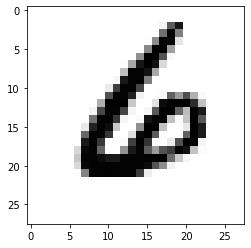

In [19]:
image = training_images[2345]
targets = training_targets[2345]

def display_output(outputs, targets):
    """Display the neuron values for a layer of the neural network"""
    vals = {'Output': outputs.flatten(), 'Target': targets.flatten()}
    output_table = pd.DataFrame(vals)
    print(output_table)
    
# Propagate the image through the network
outputs = mnist_neural_network(image)
# Display the values of the output neurons
display_output(outputs, targets)
# Display the input image
display_image(image)

The output from the neural network is displayed above the sample image, which depicts the numerical digit $6$. Notice that while the produced output is still quite far from the target output, it does capture the target output's most important feature, viz., the neuron in position $6$ in the output layer is the one with the largest numerical value. Let us appeal to this property of the output of the neural network to see how well the network can identify the handwritten digits depicted by the images in the MNIST dataset. To test the neural network, we will ask it to identify the numbers depicted by the $10,000$ images in the dataset `testing_images`, which were not used to train the network.  

In [31]:
def identify_digit(network, image):
    """Use a neural network to identify the handwritten digit depicted in an image"""
    outputs = network(image)
    # Return the neural network's prediction of the digit depicted in the image (the function "np.argmax" returns the index of the largest value in the argument array).
    return np.argmax(outputs)


def test_network(network):
    # Total number of correct ids
    correct = 0 
    for i in range(len(testing_images)):
        image = testing_images[i]
        digit = testing_labels[i]
        prediction = identify_digit(network, image)
        # If the neural network correctly ids the digit, add 1 to the number of correct guesses. If not, do nothing.
        if (prediction == digit):
            correct += 1
    
    # Print the results
    print(f"The neural network identified {correct}/10000 ({round((correct / 10000) * 100, 2)}%) of the images correctly.") 
    
test_network(mnist_neural_network)

The neural network identified 7728/10000 (77.28%) of the images correctly.


## What is Machine Learning?

[ADD CONTENT HERE]

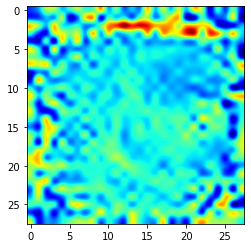

In [23]:
# Express the array of weights connecting the input neurons to a specific output neuron as a 2-d array.  
weight_maps = [[] for i in range(10)]
for number in range(10):
    for px in range(784):
        weight_maps[number].append(weights[px][number])
        
weight_maps = [np.array(weight_maps[i]) for i in range(10)] # IGNORE THIS LINE

def display_correlation_map(number):
    """Display the weights connecting the input neurons to a specific output neuron as a correlational heat map"""
    correlation_map = np.array([weight_maps[number][i * 28: (i + 1) * 28] for i in range(28)])
    plt.imshow(correlation_map, interpolation='catrom', cmap='jet')

display_correlation_map(6)


## A Deep Neural Network

While the simple 2-layer neural network that we implemented above performed reasonably well at the task of identifying the handwritten digits depicted by the images in the MNIST database, if we wish to improve the overall performance of the network, we must consider what factors limited its accuracy.

Recall that in a simple 2-layer network, the value of the $i^{\mathrm{th}}$ neuron in the output layer is computed by taking a weighted average of the values of the input neurons:
$$ 
    o_i = \sum_{j=0}^{N_0-1} v_j w_{ji} 
$$
This means, in effect, that the only functional dependencies between the inputs and the outputs that the network can discover are those with a linear form. Thus, in training the 2-layer network, we are essentially performing a linear regression. That is, we are utilizing the method of gradient descent as a means of drawing a best-fit line (or, in this case, a multi-dimensional hyperplane) through the data. Given this fact, it is perhaps surprising that the model should have been able to predict the digits as accurately as it did. For there is no reason to think that the function relating the pixel weights in an image to the digit displayed is even approximately linear in form. Accordingly, if we wish to improve the accuracy of our predictions, we ought to use a more sophisticated neural network that is capable of discovering at least some *non-linear* functional dependencies that may exist between the inputs and the outputs. This shall be the aim of this section.

The first complication that we will add to our neural network will be to include a third "hidden" layer of neurons, interposed between the input and output layers of the network. Again, the network will be fully connected in the sense that every neuron in the input layer will be connected to every neuron in the hidden layer, and every neuron in the hidden layer will be connected to every neuron in the output layer. The graph of such a fully connected 3-layer neural network is pictured below:

![nn_deep](../assets/images/mnist/nn_deep.png)

To describe the behavior of this sort of network more precisely, we will extend the notation that we used to describe the simple 2-layer network as follows:

1. The network's input layer will be referred to as layer $0$, the hidden layer will be referred to as layer $1$, and the output layer will be referred to as layer $2$. 
2. For $i=0,1,2$, $N_i$ is the number of nodes in layer $i$ . 

For $t=0,\ldots,T-1$ and $i=0,1$:

3. $w^{i,t} = \begin{bmatrix}
                w^{i,t}_{00} & w^{i,t}_{01} & \cdots & w^{i,t}_{0(N_1-1)}\\
                w^{i,t}_{10} & w^{i,t}_{11} & \cdots & w^{i,t}_{1(N_1-1)}\\
                \vdots & \vdots & \ddots & \vdots\\
                w^{i,t}_{(N_0-1)0} & w^{i,t}_{(N_0-1)1} & \cdots & w^{i,t}_{(N_0-1)(N_1-1)}\\
             \end{bmatrix}$, where $w^{i,t}_{jk}=$ the weight of the link connecting the $j^{\mathrm{th}}$ neuron in layer $i$ to the $k^{\mathrm{th}}$ neuron in layer $i+1$ at the point at which the network is trained on the $t^{\mathrm{th}}$ training input.

How are inputs propagated through the network? The obvious answer is to propagate the inputs through the two layers of the network successively. This means that we first compute the values of the neurons in the hidden layer by taking weighted averages of the values of the neurons in the input layer. Then, we compute the values of the neurons in the output layer by taking weighted averages of the values of the neurons in the hidden layer. Formally, if $o^{i,t} = [o^{i,t}_0,\ldots, o^{t}_{N_i-1}]$, where $o^{i,t}_j = $ the value assigned to the $j^{\mathrm{th}}$ neuron in layer $i$ by propagating the $t^{\mathrm{th}}$ training input through the network, then (i) $o^{0,t} = v^t$ and (ii) for $i=0,1$: $o^{i+1,t} = o^{i,t}\cdot w^{i,t}$, i.e.:
$$ 
    o^{0,t}_i = v^t_i 
$$

$$ 
    o^{1,t}_i = \sum_{j=0}^{N_0-1} o^{0,t}_j w^{0,t}_{ji} = \sum_{j=0}^{N_0-1} v^t_j w^{0,t}_{ji} 
$$

$$
o^{2,t}_i = \sum_{j=0}^{N_1-1} o^{1,t}_j w^{1,t}_{ji} = \sum_{j=0}^{N_1-1}\left(\sum_{k=0}^{N_0-1} v^t_k w^{0,t}_{kj}\right) w^{1,t}_{ji} 
$$
Note that this last equation, relating the values of the output neurons to those of the input neurons, can be rewritten:
$$
\begin{eqnarray}
o^{2,t}_i &=& \sum_{j=0}^{N_1-1}\left(\sum_{k=0}^{N_0-1} v^t_k w^{0,t}_{kj}\right) w^{1,t}_{ji} \\
          &=& \sum_{j=0}^{N_1-1}\left(\sum_{k=0}^{N_0-1} v^t_k w^{0,t}_{kj}w^{1,t}_{ji}\right) \\
          &=& \sum_{k=0}^{N_0-1}\left(\sum_{j=0}^{N_1-1} v^t_k w^{0,t}_{kj}w^{1,t}_{ji}\right) \\
          &=& \sum_{k=0}^{N_0-1}v^t_k\left(\sum_{j=0}^{N_1-1} w^{0,t}_{kj}w^{1,t}_{ji}\right) \\
\end{eqnarray}
$$
Thus, this equation is still of the form:
$$
o^{2,t}_i = \sum_{k=0}^{N_0-1}v^t_k\lambda_k
$$
In other words, the neural network can still only express linear functional dependencies between the input and output neurons. Weighted averages of weighted averages are still just weighted averages. Thus, without altering the propagation algorithm, a neural network with multiple interior layers can still only perform linear regressions. So, how do we introduce non-linearity into the propagation algorithm? One standard way to do so is to introduce a "propagation threshold" for some of the neurons in the network. If the value of a neuron falls below this threshold, then it will fail to fire, i.e., its value will cease to propagate through the network (similar threshold effects characterize the production of so-called action potentials by neurons in the brain). For example, let us stipulate that a neuron in the hidden layer will only propagate its value to the neurons in the output layer provided this value is greater than zero. In mathematical terms, this means that before we compute the values of the neurons in the output layer by taking weighted averages of the values of the neurons in the hidden layer, we will first replace these values with the result of applying to each, the following function:
$$ 
\begin{eqnarray}
f(x) = \max(0,x) = \left\{ \begin{array}{ll} x & \mathrm{if\, } x > 0\\
0 & \mathrm{otherwise}\end{array}\right.
\end{eqnarray}
$$
(in the deep learning literature this function is referred to as "ReLU", which stands for rectified linear unit). Applying this threshold effect, the propagation of values from the hidden layer to the output layer of the network is now defined by the equation:
$$
o^{2,t}_i = \sum_{j=0}^{N_1-1} f\left(o^{1,t}_j\right) w^{1,t}_{ji} = \sum_{j=0}^{N_1-1}f\left(\sum_{k=0}^{N_0-1} v^t_k w^{0,t}_{kj}\right) w^{1,t}_{ji} 
$$
Later, we will consider what kinds of functional dependencies can be captured by the network, but for now, we simply note that these dependencies need no longer be linear.  

### Gradient Descent in a 3-Layer Network


As was the case with the simple 2-layer network, we will train the network by successively feeding each training input to the network, compare the output to the corresponding training target, and update the weights in accordance with the method of gradient descent. Since the network now has a more complicated architecture, the details of this method are somewhat more involved:  

1. **Propagate the $t^{\mathrm{th}}$ training input through the network.** As discussed above, inputs are propagated through the network in accordance with the following equations:
$$ 
\begin{eqnarray}
    o^{0,t} &=& v^t \\ 
    o^{1,t} &=& o^{0,t}\cdot w^{0,t} \\ 
    o^{2,t} &=& f\left(o^{1,t}\right)\cdot w^{1,t}
\end{eqnarray}
$$
Here, and in what follows, if $v$ is the vector $[v_0,\ldots,v_n]$, then $f(v)$ is the vector that results from the elementwise application of $f$ to $v$, i.e., $f(v) = [f(v_{0}),\ldots,f(v_n)]$.  

In [24]:
def relu(x):
    """Rectified Linear Unit (ReLU). Used to produce a non-linear threshold effect in the network"""
    return x if (x > 0) else 0 

relu = np.vectorize(relu) #IGNORE THIS LINE

In [25]:
def propagate(weights, inputs):  # NOTE: weights is a 2-length array (weights[i] (i = 0,1) stores the weights connecting layers i and i+1).
    """Propagate inputs through the deep neural network"""
    layers = []
    # First, set the values of the neurons in layer 0 to the input values
    layers.insert(0, inputs)
    # Next, compute the values of the neurons in layer 1 by taking weighted averages.
    layers.insert(1, np.dot(layers[0], weights[0]))
    # Finally, compute the values of the neurons in layer 2 by applying ReLU and then taking weighted averages
    layers.insert(2, np.dot(relu(layers[1]), weights[1]))        
        
    return layers # NOTE: layers is now a 3-length array (layers[i] (i = 0,1,2) stores the values of the neurons in layer i).

2. **Measure the degree of deviation (or "loss") of the outputs from the corresponding training target**. As before, we will measure the loss in the network outputs by the mean-squared error:
$$
E(o^{2,t}) = \frac{1}{N_2}(o^{2,t} - l^t)^2 = \frac{1}{N_2}\sum_{i=0}^{N_2-1} (o^{2,t}_i - l^t_i)^2
$$

3. **Adjust the network weights by some amount in the opposite direction of the gradient of the loss function.** To carry out this step, we must compute the $w^{i,t}_{jk}$-component of the gradient of the error function $E$, for each of the weights in the network. We will first do so for the weights connecting the neurons in layer 1 to those in layer 2, i.e., to weights of the form $w^{1,t}_{ij}$. The partial derivative of $E$ with respect to $w^{1,t}_{ij}$ is given by:
$$
\begin{eqnarray}
    \frac{\partial E}{\partial w^{1,t}_{ij}} &=& \frac{\partial}{\partial w^{1,t}_{ij}}\left\{\frac{1}{N_2}\sum_{n=0}^{N_2-1} (o^{2,t}_n - l^t_n)^2\right\} \\
                                        &=& \frac{\partial}{\partial w^{1,t}_{ij}}\left\{\frac{1}{N_2}\sum_{n=0}^{N_2-1} \left(\left(\sum_{m=0}^{N_1-1} f(o^{1,t}_m) w^{1,t}_{mn}\right) - l^t_n\right)^2\right\} \\
                                        &=& \frac{\partial}{\partial w^{1,t}_{ij}}\left\{\frac{1}{N_2}\left(\left(\sum_{m=0}^{N_1-1} f(o^{1,t}_m) w^{1,t}_{mj}\right) - l^t_j\right)^2\right\}\\
                                        &=& \frac{2f(o^{1,t}_i)}{N_2}\left(\left(\sum_{m=0}^{N_1-1} f(o^{1,t}_m) w^t_{mj}\right) - l^t_j\right) \\
                                        &=& \frac{2f(o^{1,t}_i)}{N_2}\left(o^{2,t}_j - l^t_j\right) \\
\end{eqnarray}
$$

Note that this is very similar to the equation for updating the weights in the simple 2-layer network, with the one exception that the quantity $(o^{2,t}-l^t)$ is not multipled by the value of the corresponding neuron, but rather by the image of this value under the function $f$. 
     To update the weights connecting the neurons in the input layer to those in the hidden layer, we must compute the partial derivative of the loss function $E$ with respect to $w^{0,t}_{ij}$. This partial derivative is given by:
     $$
\begin{eqnarray}
    \frac{\partial E}{\partial w^{0,t}_{ij}} &=& \frac{\partial}{\partial w^{0,t}_{ij}}\left\{\frac{1}{N_2}\sum_{n=0}^{N_2-1} (o^{2,t}_n - l^t_n)^2\right\} \\
                                        &=& \frac{\partial}{\partial w^{0,t}_{ij}}\left\{\frac{1}{N_2}\sum_{n=0}^{N_2-1} \left(\left(\sum_{m=0}^{N_1-1} f(o^{1,t}_m) w^{1,t}_{mn}\right) - l^t_n\right)^2\right\} \\
                                        &=& \frac{\partial}{\partial w^{0,t}_{ij}}\left\{\frac{1}{N_2}\sum_{n=0}^{N_2-1} \left(\left(\sum_{m=0}^{N_1-1} f(o^{1,t}_m) w^{1,t}_{mn}\right) - l^t_n\right)^2\right\} \\
                                        &=& \frac{1}{N_2}\sum_{n=0}^{N_2-1}\left(\frac{\partial}{\partial w^{0,t}_{ij}}\left\{\left(\left(\sum_{m=0}^{N_1-1} f(o^{1,t}_m) w^{1,t}_{mn}\right) - l^t_n\right)^2\right\}\right) \\
                                        &=& \frac{1}{N_2}\sum_{n=0}^{N_2-1}\left(2\left(\left(\sum_{m=0}^{N_1-1} f(o^{1,t}_m) w^{1,t}_{mn}\right) - l^t_n\right) \frac{\partial}{\partial w^{0,t}_{ij}}\left\{f(o^{1,t}_j) w^{1,t}_{jn} \right\}\right) \\
                                        &=& \frac{1}{N_2}\sum_{n=0}^{N_2-1}\left(2\left(o^{2,t}_n - l^t_n\right) w^{1,t}_{jn} \left(\frac{\partial}{\partial w^{0,t}_{ij}}\left\{f(o^{1,t}_j) \right\}\right)\right)
\end{eqnarray}
    $$
The quantity $\frac{\partial}{\partial w^{0,t}_{ij}}\left\{f(o^{1,t}_j) \right\}$ can be calculated using the chain rule as follows:
    $$
\begin{eqnarray}
   \frac{\partial}{\partial w^{0,t}_{ij}}\left\{f(o^{1,t}_j) \right\} &=& f'(o^{1,t}_j)\left(\frac{\partial o^{1,t}_j}{\partial  w^{0,t}_{ij}}\right) \\
                                                                      &=& f'(o^{1,t}_j)\left(\frac{\partial}{\partial  w^{0,t}_{ij}}\left\{ \sum_{n=0}^{N_0-1} o^{0,t}_n w^{0,t}_{nj}\right\}\right)\\
                                                                      &=& f'(o^{1,t}_j)\,o^{0,t}_i
\end{eqnarray}
    $$
Here $f'$ is the derivative of the function $f$:
    $$
f'(x) = \frac{df}{dx} = \left\{\begin{array}{ll} 1 & \mathrm{if\,} x>0 \\
                               0 & \mathrm{otherwise}
                               \end{array}\right.
    $$  
(NB: in fact, the function $f$ is not differentiable at $0$, but we will stipulate that $f'(0)=0$). Plugging this back into the above equation, we get:
$$
\begin{eqnarray}
    \frac{\partial E}{\partial w^{0,t}_{ij}} &=& \frac{2o^{0,t}_i f'(o^{1,t}_j)}{N_2}\sum_{n=0}^{N_2-1}\left(o^{2,t}_n - l^t_n\right)w^{1,t}_{jn}  \\
\end{eqnarray}
$$
Let us summarize the above results. The $w^{1,t}_{ij}$-component of the gradient of the error function is proportional to:
$$f(o^{1,t}_i)\left(o^{2,t}_j - l^t_j\right)$$
and the $w^{0,t}_{ij}$-component of the gradient of the error function is proportional (in that same proportion) to:
$$o^{0,t}_i f'(o^{1,t}_j)\sum_{n=0}^{N_2-1}\left(o^{2,t}_n - l^t_n\right)w^{1,t}_{jn} $$
Just as before, to adjust the weights in the direction opposite to the gradient means to *subtract* from each weight some fixed positive multiple of this quantity, i.e.: 
$$
w^{1, t+1}_{ij} = w^{1, t}_{ij} - \alpha f(o^{1,t}_i)\left(o^{2,t}_j - l^t_j\right)
$$
$$
w^{0, t+1}_{ij} = w^{0, t}_{ij} - \alpha o^{0,t}_i f'(o^{1,t}_j)\sum_{n=0}^{N_2-1}\left(o^{2,t}_n - l^t_n\right)w^{1,t}_{jn}
$$
In matrix notation, these equations can be expressed:
$$
w^{1, t+1} = w^{1,t} - \alpha \left(f(o^{1,t})^{\top}\cdot(o^{2,t}-l^t)\right)
$$
$$
w^{0, t+1} = w^{0, t} - \alpha\left((o^{0,t})^{\top}\cdot  \left(f'(o^{1,t}) \ast \left((o^{2,t} - l^t)\cdot (w^{1,t})^{\top}   \right)\right)\right)
$$
where (as usual) $\cdot$ represents matrix multiplication and $\ast$ represents the element-wise product of two matrices with the same dimensions. The following code implements this algorithm: 


In [26]:
def d_relu(x):
    """The derivative of the ReLU function"""
    return 1 if (x > 0) else 0

d_relu = np.vectorize(d_relu) # IGNORE THIS LINE

def gradient_descent(weights, inputs, targets, alpha):
    """Update weights using back-propagated gradient descent wrt mean squared loss function"""
    # Propagate the inputs throught the network
    layers = propagate(weights, inputs)
    # Compute the gradient (scaled by alpha) for both weights[0] and weights[1]    
    scaled_gradient_1 = alpha * (np.dot(relu(layers[1]).T, layers[2] - targets)) 
    scaled_gradient_0 = alpha * (np.dot(layers[0].T, 
                                       d_relu(layers[1]) * np.dot(layers[2] - targets, # * is elementwise multiplication for matrices with the same dimension
                                                                 weights[1].T)))
    
    # Adjust the weights by subtracting the scaled gradient
    weights[0] -= scaled_gradient_0
    weights[1] -= scaled_gradient_1

    return weights

4. **Repeat steps 1-4 for the $(t+1)^{th}$ training input.** Training the network consists in updating the weights by successively applying the gradient descent algorithm to each of the training inputs. In other words, given initial weights, $w^{0,0}$ and $w^{1,0}$, the training process returns a neural network with weights, $w^{0,T}$ and $w^{1,T}$, obtained through the repeated application of the gradient decent algorithm.


In [27]:
def train_network(initial_weights, training_inputs, training_targets, alpha):
    """Train the neural network using the method of gradient descent"""
    # Initialize weights
    weights = initial_weights
    # Update weights for each training input
    for t in range(len(training_inputs)):
        inputs = training_inputs[t]
        targets = training_targets[t]
        weights = gradient_descent(weights, inputs, targets, alpha)
        
    # Return the trained neural network
    def trained_network(inputs):
        layers = propagate(weights, inputs)
        return layers[2]
    
    return trained_network, weights          

### Training and Testing the MNIST Deep Neural Network

We are now in a position to train our deep neural network to identify the digits depicted in the images in the MNIST dataset. In addition to its $784$ input neurons (one for each pixel in a given image) and $10$ output neurons (one for each of the numerical digits $0,\ldots,9$), the network will also contain a hidden layer consisting of $40$ neurons. Just as before, we will train the network on the first $55,000$ images from the dataset, using random initial weights in the interval $[-0.1, 0.1]$, and a learning rate of $0.005$.

In [28]:
# Generate random weights between -0.1 and 0.1
hidden_layer_size = 40
random_weights = []
random_weights.insert(0, 0.2 * np.random.rand(784, hidden_layer_size) - 0.1)
random_weights.insert(1, 0.2 * np.random.rand(hidden_layer_size, 10) - 0.1)

# Train the neural network - THIS TAKES TIME
mnist_deep_neural_network, weights = train_network(random_weights, training_images, training_targets, 0.005)

We now have a deep neural network that we can use to identify handwritten digits, such as those depicted in the images in the MNIST database. Let's see how well it performs on the $5,000$ images not included in the training set. 

In [32]:
test_network(mnist_deep_neural_network)

The neural network identified 9044/10000 (90.44%) of the images correctly.


The accuracy of the network has significantly improved, but we can improve it still further by retraining the network on the training inputs several more times. In the deep learning literature, a single training cycle in which the network processes all the training inputs is referred to as an *epoch*. Let's allow the network to train for $5$ epochs and see how well it performs.

In [35]:
# Load the weights to avoid the need to train the network
weights = np.load("../assets/data/mnist/trained-networks/dnn_5.npz")
weights = [weights['arr_0'], weights['arr_1']]

def mnist_deep_neural_network(inputs):
    layers = propagate(weights, inputs)
    return layers[2]

In [36]:
test_network(mnist_deep_neural_network)

The neural network identified 9348/10000 (93.48%) of the images correctly.


## The Universal Approximation Theorem

[ADD CONTENT HERE]

## A Convolutional Neural Network

[ADD CONTENT HERE]